<a href="https://colab.research.google.com/github/nigamdivyyanshi16/Exploratory-Data-Analysis-Python/blob/main/Zomato_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement

In this project, we aim to analyze Zomato restaurant data to identify key factors
that contribute to the success of restaurants, as measured by their ratings. By
exploring various features such as location, cuisine, pricing, and service
offerings, we aim to provide insights that can help restaurant owners and
Zomato users make informed decisions.

Project Flow
1. Data Collection and Loading
2. Data Preprocessing
3. EDA-Exploratory Data Analysis
4. Recommendations
5. Conclusion

1. Data Collection and Loading


In [1]:
#installation of libraries
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib


In [2]:
#importing libraries
import os#used to import paths for different file where we need Operating System functionalities hence, it is options
import numpy as np#scientific calculations and mathematical operations
import pandas as pd#data manipulation and analysis
import matplotlib.pyplot as plt#data visualization
import seaborn as sns#advanced data visualization
#warnings library
import warnings
warnings.filterwarnings("ignore")#to avoid warnings when we work with large data

In [8]:
#Load dataset
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA DATASETS/Indian-Resturants.csv", encoding="unicode_escape")

In [9]:
#showing data
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [10]:
#top 5 data rows
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


Data Overview:

Explore the basic characteristics of the dataset, including dimensions, data
types, and missing values.

In [11]:
df.shape
#attribute

(211944, 26)

In [12]:
#To see missing values
df.isnull().sum()

,0
res_id,0
name,0
establishment,0
url,0
address,134
city,0
city_id,0
locality,0
latitude,0
longitude,0


Data Preprocessing

  RULE FOR HANDLING MISSING VALUES

  Check the percentage of missing values:
  1. if missing values are greater than 25%(standard), we will drop the column(default, you are domain expert).
  2. if missing values are lesser than 25%, then we will cap the values using mean statistical method

In [13]:
##percentage of missing values in each column
(df.isnull().sum()/len(df))*100

,0
res_id,0.000000
name,0.000000
establishment,0.000000
url,0.000000
address,0.063224
city,0.000000
city_id,0.000000
locality,0.000000
latitude,0.000000
longitude,0.000000


Now, first we will drop zipcode column  as it is missing value percentage is 76% which is very high

In [14]:
df.drop("zipcode",axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  country_id            211944 non-null  int64  
 11  locality_verbose      211944 non-null  object 
 12  cuisines              210553 non-null  object 
 13  timings               208070 non-null  object 
 14  average_cost_for_two  211944 non-null  int64  
 15  

In [ ]:
#required capping column names
#address,cuisines,timings,opentable_support

In [16]:
##for objects, we will use this to cross check the frequency of varriables
df['timings'].value_counts()

,count
timings,
11 AM to 11 PM,26605
10 AM to 10 PM,5419
11 AM to 10 PM,4933
11 AM to 11 PM (Mon-Sun),4063
10 AM to 11 PM,3949
...,...
"10:30 AM to 9 PM (Mon-Sat), Sun Closed",1
"6pm â 11:30pm (Mon),6pm â 11pm (Tue-Sun)",1
"12 Noon to 11:45 PM, 12 Midnight to 12:30 AM",1


In [21]:
#handle missing values together to prevent consumption of time
#handling missing in categorical variable
list_of_cat=["address", "cuisines", "timings"]
#as here these are mix of all data types so, we will be separating according to variable types
for i in list_of_cat:
  df[i]=df[i].fillna(df[i].mode()[0])

<Axes: ylabel='opentable_support'>

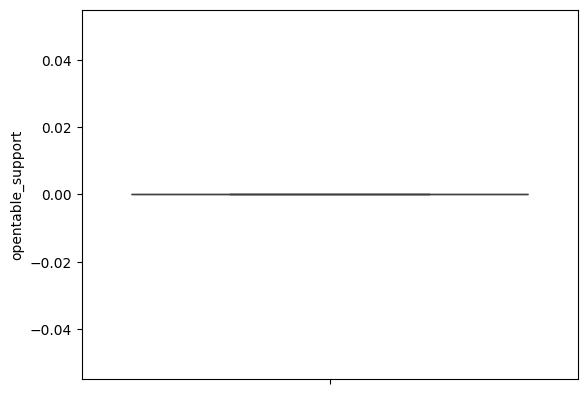

In [18]:
#handling missing in numerical variable
#list_of_cols=["opentable_support"]
#first to handle missing values in numerical mean or median is used so, first check does it have outliers or not
sns.boxplot(df["opentable_support"])

In [17]:
df['opentable_support'].value_counts()

,count
opentable_support,
0.0,211896


As opentable_support has 211896 values which are 0, hence there is no use of it.so, drop this column

In [19]:
df.drop('opentable_support',axis=1,inplace=True)

In [22]:
df.isnull().sum()
#to check if above process actually got implemented or not

,0
res_id,0
name,0
establishment,0
url,0
address,0
city,0
city_id,0
locality,0
latitude,0
longitude,0


In [24]:
#to copy the data what if any mishap happened to original data
data_preprocessed=df.copy()
#to save this shallow copy
df.to_csv("data_preprocessed.csv")

Basic Statitistics

Calculate and visualize the average rating of restaurants.
Analyze the distribution of restaurant ratings to understand the overall rating
landscape
1.Statistical Analysis
2.Univariate- analysis using single column/feature in dataset(shown by piechat,bar chat,histogram)
(univariate analysis can be done to features like rating, cities)(how many time anything has been order from this particular city, gender)
3.Bivariate analysis-analysis using two features/columns in dataset(with 2 axis x and y axis, ideal by pairplot)
(This can be done that how many people have given rating from what city)
4.Multivariate analysis - analysis using more than two features/columns in dataset(used for correlations, ideal for heatmap)